In [7]:
import numpy as np
import pandas as pd
from pathlib import Path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('vader_lexicon')
#nltk.download('averaged_perceptron_tagger')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/maryamakbar/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [8]:
path = Path.cwd() / "DisneylandReviews.csv"

disney_orig = pd.read_csv(path, encoding= 'latin-1', header = [0], skipinitialspace= True, index_col=0)

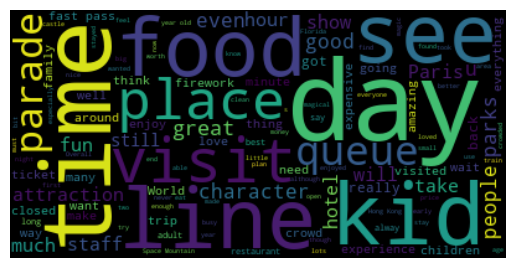

In [9]:
txt = ' '.join(disney_orig["Review_Text"].fillna(''))

filter_out = set(STOPWORDS)
filter_out.update(['park','ride','rides','went','lot','Disneyland','go','one','Disney'])

wordcloud = WordCloud(stopwords=filter_out).generate(txt)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [10]:
def preproc_txt(text):

    orig_tokens = word_tokenize(text.lower())

    filt_tokens = [token for token in orig_tokens if token not in stopwords.words("english")]

    lemm_tokens = [WordNetLemmatizer().lemmatize(token) for token in filt_tokens]

    proc_txt = ''.join(lemm_tokens)

    return proc_txt

disney_orig["Review_Text"].apply(preproc_txt)

def get_sent(text):
    scores = SentimentIntensityAnalyzer().polarity_scores(text)
    sent = 1 if scores['pos']>0 else 0
    return sent

disney_orig["Sentiment"]= disney_orig["Review_Text"].apply(get_sent)
print(disney_orig)

           Rating Year_Month     Reviewer_Location  \
Review_ID                                            
670772142       4     2019-4             Australia   
670682799       4     2019-5           Philippines   
670623270       4     2019-4  United Arab Emirates   
670607911       4     2019-4             Australia   
670607296       4     2019-4        United Kingdom   
...           ...        ...                   ...   
1765031         5    missing        United Kingdom   
1659553         5    missing                Canada   
1645894         5    missing          South Africa   
1618637         4    missing         United States   
1536786         4    missing        United Kingdom   

                                                 Review_Text  \
Review_ID                                                      
670772142  If you've ever been to Disneyland anywhere you...   
670682799  Its been a while since d last time we visit HK...   
670623270  Thanks God it wasn   t too hot

In [11]:
#Function to get the adjectives.
def get_adjectives(text): 
    blob = TextBlob(text)
    return [ word for (word,tag) in blob.tags if tag == "JJ"]

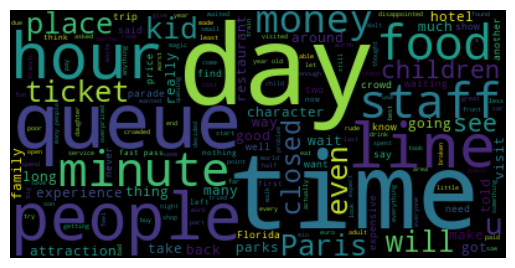

In [14]:
neg_rating = disney_orig[disney_orig['Rating']==1]
neg_rating
neg_rating_txt = ''.join(neg_rating['Review_Text'].fillna(' '))

#Create and generate a word cloud image:
negative_rating_wordcloud = WordCloud(stopwords= filter_out).generate(neg_rating_txt)

#Display the generated image
plt.imshow(negative_rating_wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

/Users/maryamakbar/Desktop/personal_project/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/maryamakbar/Desktop/personal_project/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/maryamakbar/Desktop/personal_project/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


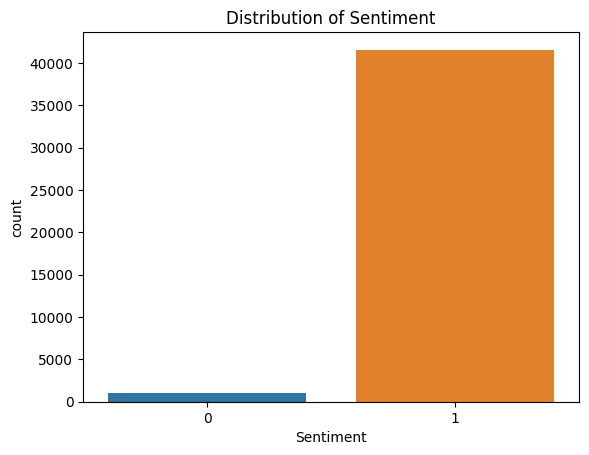

In [16]:
#Distribution of ranking
import seaborn as sns

sns.countplot(x='Sentiment', data=disney_orig)
plt.title('Distribution of Sentiment')
plt.show()

In [17]:
disney_orig["Polarity"]= disney_orig["Review_Text"].apply(SentimentIntensityAnalyzer().polarity_scores)

In [18]:
disney_orig

,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Sentiment,Polarity
Review_ID,,,,,,,
670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,1,"{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp..."
670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,1,"{'neg': 0.04, 'neu': 0.73, 'pos': 0.231, 'comp..."
670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,1,"{'neg': 0.024, 'neu': 0.742, 'pos': 0.235, 'co..."
670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,1,"{'neg': 0.08, 'neu': 0.76, 'pos': 0.16, 'compo..."
670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,1,"{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp..."
...,...,...,...,...,...,...,...
1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris,1,"{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp..."
1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris,1,"{'neg': 0.02, 'neu': 0.776, 'pos': 0.204, 'com..."
1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris,1,"{'neg': 0.021, 'neu': 0.881, 'pos': 0.098, 'co..."


In [19]:
def get_neutrality(text): 
    neu = SentimentIntensityAnalyzer().polarity_scores['neu']
    return neu

In [ ]:
def get_polarity(text):
    scores = SentimentIntensityAnalyzer().polarity_scores(text)
    pos_sent = scores['pos']
    return pos_sent